# Group FARARA
## 11.1

In [1]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.stats import cumfreq
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
image = ndimage.imread('testimg.jpg').flatten()
image = image / np.max(image)

In [3]:
image0 = image
image1 = image + np.random.normal(0, 0.05, image.shape)
image2 = image + np.random.normal(0, 0.1, image.shape)

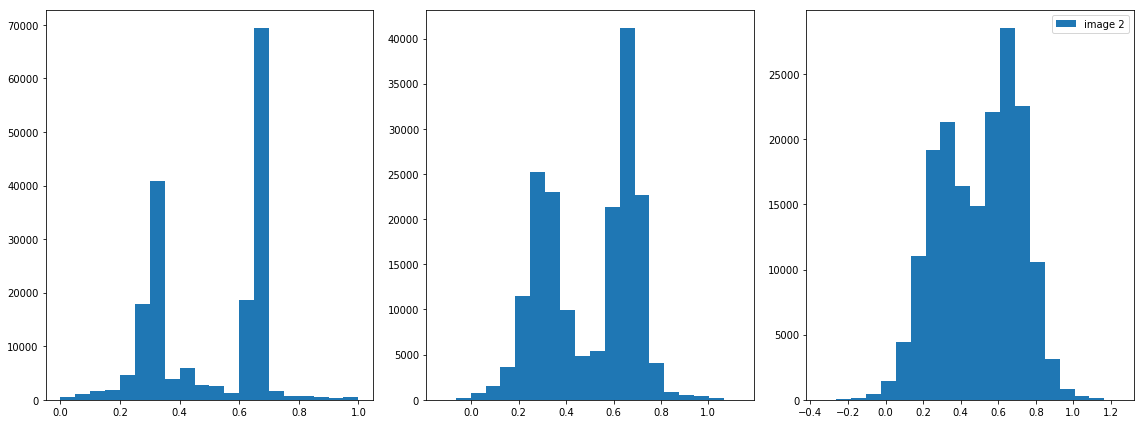

In [4]:
gs1 = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(16, 6))

plt.subplot(gs1[0])
plt.hist(image0, bins=20, label="image 0")

plt.subplot(gs1[1])
plt.hist(image1, bins=20, label="image 1")


plt.subplot(gs1[2])
plt.hist(image2, bins=20, label="image 2")
plt.legend()
fig.tight_layout()

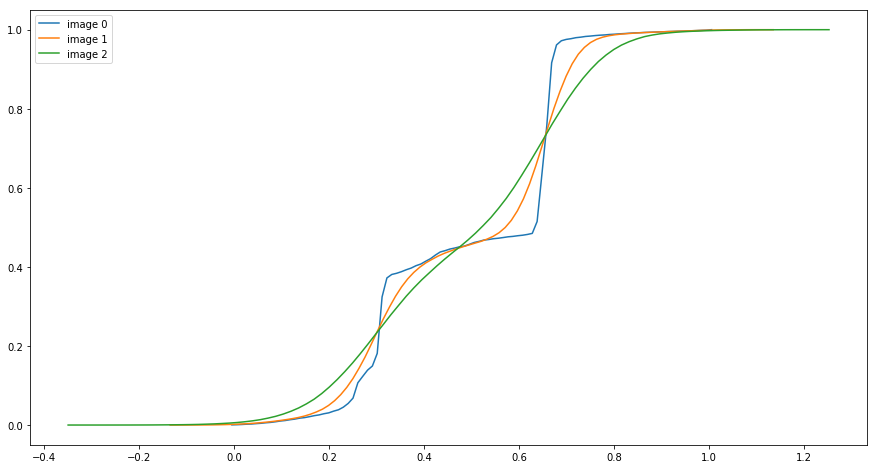

In [5]:
plt.figure(figsize=(15, 8))
for key, i in enumerate([image0, image1, image2]):
    res = cumfreq(i, 100)
    x = res.lowerlimit + np.linspace(0, res.binsize*res.cumcount.size, res.cumcount.size)
    cc = res.cumcount / np.max(res.cumcount)
    plt.plot(x, cc, label="image {}".format(key))
plt.legend()
plt.show()

In [6]:
def H(u):
    return np.all(np.abs(u) < 0.5)

def density_estimate(train, x_alpha, h):
    p = train.shape[0]
    
    estimate = 0
    for x in train:
        estimate += H((x - x_alpha) / h)
        
    return (1/h) * (1/p) * estimate

def neg_log_like(train, test, h):
    estimates = []
    for x in test:
        estimates.append(-np.log(density_estimate(train, x, h)))
    return np.mean(estimates)

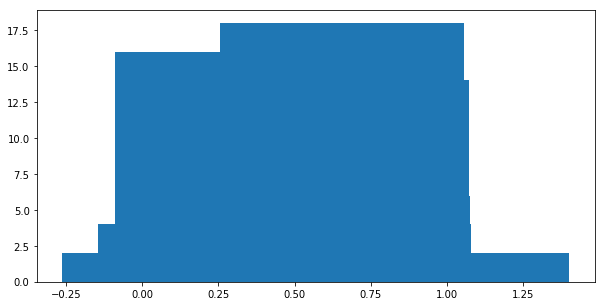

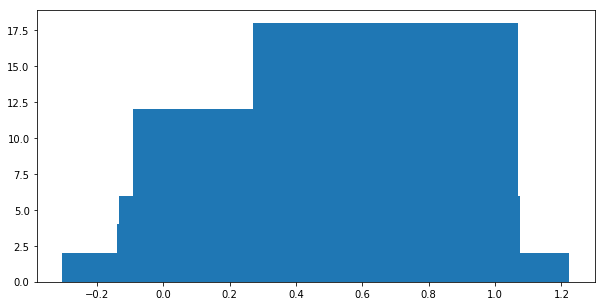

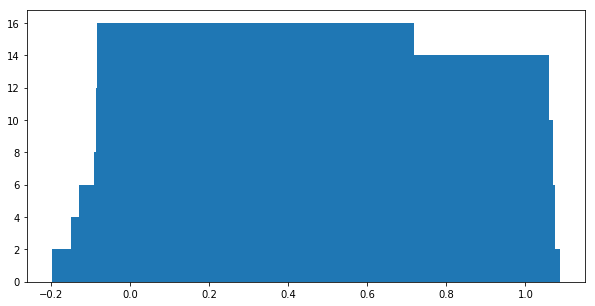

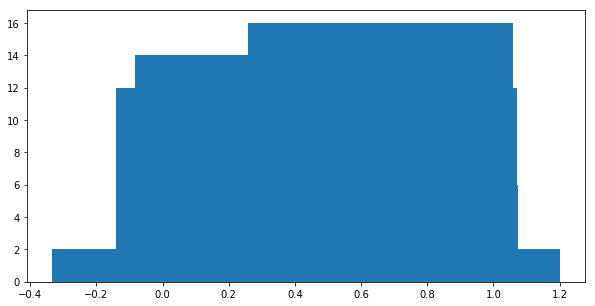

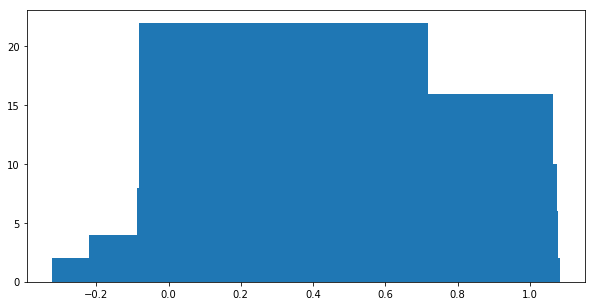

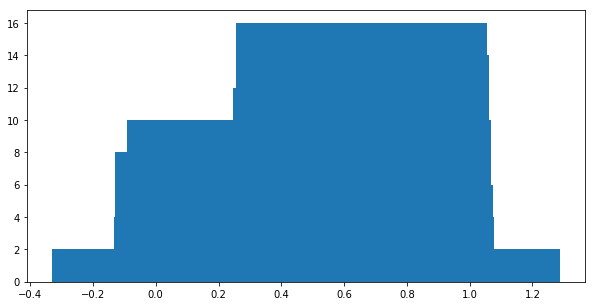

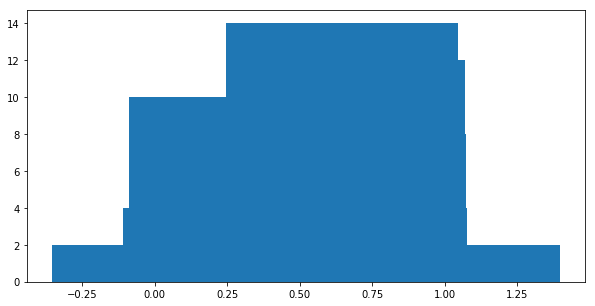

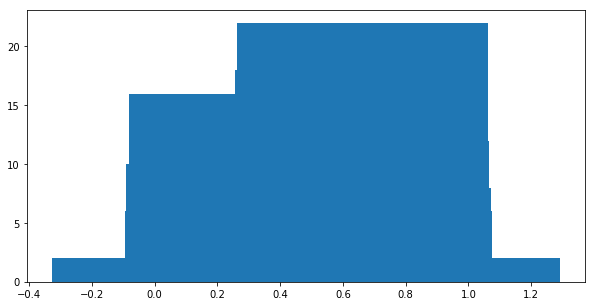

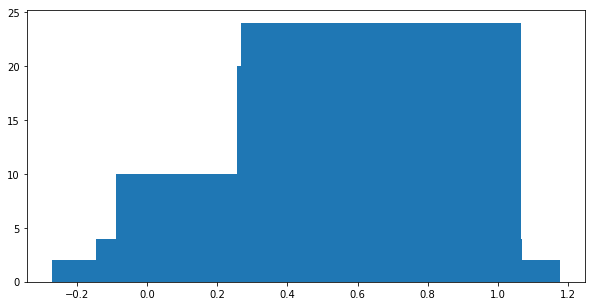

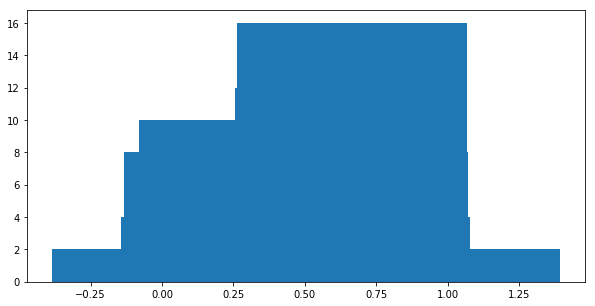

In [7]:
h = 0.005

for _ in range(10):
    train, test = train_test_split(image0, train_size=100)
    estimates = []
    for t in train:
        estimates.append(density_estimate(train, t, h))
    plt.figure(figsize=(10,5))
    plt.bar(train, estimates)
    #print(neg_log_like(train, test, h))

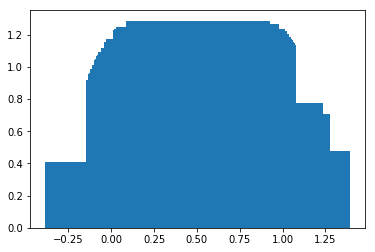

In [18]:
from sklearn.neighbors import KernelDensity

plt.figure()
# estimate density on samples
kde = KernelDensity(kernel='epanechnikov', bandwidth=0.5).fit(train.reshape(-1, 1))
log_dens = kde.score_samples(train.reshape(-1, 1))  # evaluate the density model on the data.
plt.bar(train, np.exp(log_dens))
plt.show()

## 11.2

In [37]:
class1 = np.random.multivariate_normal([2,2], [[0.7, 0],[0, 0.7]], 67)
class2 = np.random.multivariate_normal([1,1], [[0.2, 0],[0, 0.2]], 33)
data = np.vstack([class1, class2])

In [33]:
m = np.hstack([np.zeros(67), np.ones(33)])

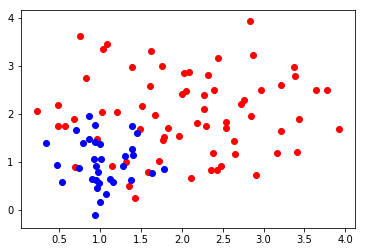

In [38]:
#plt.scatter()
plt.scatter(class1[:,0], class1[:,1], color='red')
plt.scatter(class2[:,0], class2[:,1], color='blue')